## Important Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import matplotlib.transforms as mtransforms
from sklearn.decomposition import PCA

## Data loading

In [2]:
data = pd.read_csv("iris.data",names=["Sepal Length", "Sepal Width","Petal Length" ,"Petal Width", "Class Label"])

In [3]:
data_orig = data

In [4]:
print("Dta")
print(data.info())
print("\n")

Dta
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class Label   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None




In [5]:
print("Initial rows of data")
print(data.head())
print("\n")

Initial rows of data
   Sepal Length  Sepal Width  Petal Length  Petal Width  Class Label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa




In [6]:
print("Data columns")
print(data.info())
print("\n")

Data columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class Label   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None




In [7]:
print("Data statistical properties")
print(data.describe())
print("\n")

Data statistical properties
       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000




In [8]:
print("Check for null values")
print(data.isna().sum())
print("\n")

Check for null values
Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class Label     0
dtype: int64




In [9]:
print("Drop duplicates if any............")
data = data.drop_duplicates(keep='first')
print("\n")

Drop duplicates if any............




In [10]:
print("Data dimension: ",data.shape)
print("\n")

Data dimension:  (147, 5)




##  Exploratory Data Analysis

In [11]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

Exploratory Data Analysis of Data..........


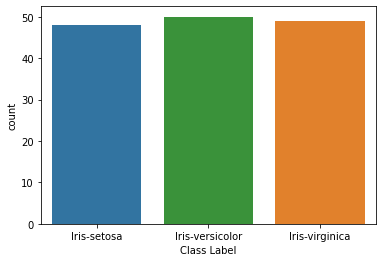

In [12]:
print("Exploratory Data Analysis of Data..........")
ax = sns.countplot(x = data['Class Label'],label="Count",palette = ['tab:blue', 'tab:green', 'tab:orange'])
plt.savefig("Countplot.png",bbox_inches = 'tight')

In [13]:
y = data["Class Label"] 
x = data.drop("Class Label",axis = 1 )

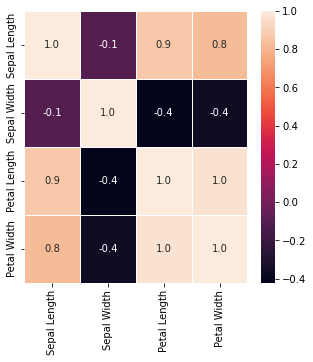

In [14]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

plt.savefig("Heatmap.png",bbox_inches = 'tight')

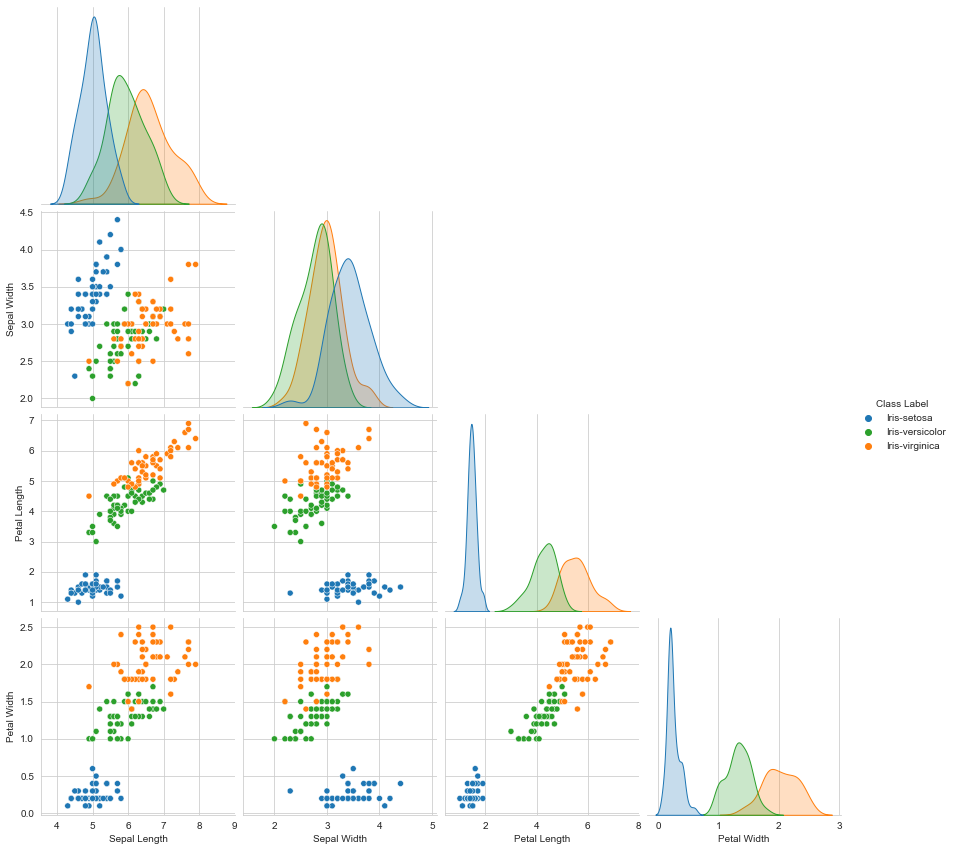

In [15]:
sns.set_style("whitegrid");
sns.pairplot(data,hue="Class Label",height=3,palette = ['tab:blue', 'tab:green', 'tab:orange'],corner=True);

plt.savefig("pairplot.png",bbox_inches = 'tight')

In [16]:
features = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['Class Label']].values


In [17]:
print("Principal Component Analysis..............................")
print("Dimension of Data before PCA: ",x.shape)
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(x)
print("Dimension of Data after PCA: ",principalComponents.shape)
print("\n")

Principal Component Analysis..............................
Dimension of Data before PCA:  (147, 4)
Dimension of Data after PCA:  (147, 2)




In [18]:
principalDf = pd.DataFrame(data = principalComponents
              ,columns = ['column_1', 'column_2'])

In [19]:
print("Print first few rows of new lower dimensional data................")
print(principalDf.head())
print("\n")

Print first few rows of new lower dimensional data................
   column_1  column_2
0 -2.710782  0.322125
1 -2.741763 -0.175061
2 -2.916691 -0.141509
3 -2.773363 -0.315205
4 -2.755418  0.330133




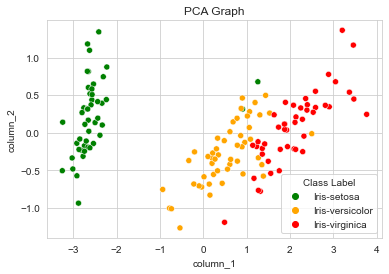

In [20]:
sns.scatterplot(x = principalDf["column_1"],y = principalDf["column_2"],hue=data["Class Label"],palette=['green','orange','red']);
plt.title("PCA Graph")
plt.savefig("PCA plot.png",bbox_inches = 'tight')

In [21]:
data.loc[data['Class Label']=="Iris-setosa","Class Label"]=0
data.loc[data['Class Label']=="Iris-versicolor","Class Label"]=1
data.loc[data['Class Label']=="Iris-virginica","Class Label"]=2

C:\Users\Saransh Sharma\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
data.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [23]:
def computecluster_rep(X, idx, K,cluster_rep):
    N, n = X.shape
    for i in range(K):
        a = []
        a = X[np.where(idx==i)] #find all points who belong to cluster i
        if a.shape[0] != 0:
            cluster_rep[i] = a.sum(axis=0)/a.shape[0] #take the mean of all those datapoints who belong to cluster i and update the location of the cluster
        else:
            cluster_rep[i] = np.zeros(cluster_rep[i].shape)
    return cluster_rep
#the function updates the values of cluster representatives by taking mean of all data points belonging to that cluster

In [24]:
def findClosestcluster_rep(X, cluster_rep):
    N = X.shape[0]
    K = cluster_rep.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(N):
        dist = np.sum(np.power(X[i] - cluster_rep,2),axis=1)#find distance of this point with all clusters 
        idx[i] = np.argmin(dist)#assign the index of the cluster nearest to the datapoint
    return idx
#the function finds the closest cluster representative for every N data points and assign cluster accordingly.
#idx stores cluster assignment

In [25]:
np.random.seed(42) #to make the random initialisations deterministic

In [26]:
def fromdatainitialise(X,K):
    rand_idx = np.random.permutation(X.shape[0]) #pick k random datapoints as intial cluster locations
    cluster_rep = X[rand_idx[0:K], :]
    return cluster_rep
#the function randomly picks k data points from sample and initialises cluster representatives using these k data points

In [27]:
def runkMeans(X, cluster_rep, findClosestcluster_rep, computecluster_rep):
    K = cluster_rep.shape[0]
    idx = np.zeros(X.shape[0])
    prev_centroid = np.zeros((cluster_rep.shape[0],cluster_rep.shape[1]))
    curr = cluster_rep
    num_iter=0
    
    for i in range(100) and prev_centroid != curr:
        idx = findClosestcluster_rep(X, cluster_rep)
        cluster_rep_new = computecluster_rep(X, idx, K,curr)
        prev_centroid = curr
        curr = cluster_rep_new
        num_iter=num_iter+1
    return cluster_rep, idx,num_iter

In [28]:
def computeCost(X,cluster_rep,idx):
    sum = 0
    for i in range(X.shape[0]):
        sum += np.linalg.norm(X[i] - cluster_rep[idx[i]])**2
    return sum/X.shape[0]
#the function calculates Jclust 

In [29]:
x = principalDf.values
# Separating out the target
y = data.loc[:,['Class Label']].values


In [30]:
def class_entropy(data_y,num_labels):
    sum_i = 0
    for i in range(1,num_labels+1):
        x = np.sum(data_y==i)
        
        if x!=0:
            sum_i += (x/data_y.shape[0])*np.log2(x/data_y.shape[0])
    return -1*sum_i

In [31]:
def cluster_entropy(cluster,num_cluster):
    sum = 0
    for i in range(num_cluster):
        x = np.sum(cluster == i)
        if x!=0:
            sum += (x/cluster.shape[0])*np.log2(x/cluster.shape[0])
            
    return -1*sum

In [32]:
def mutual(y, cluster, num_cluster, num_label):
    sum_x= 0
    for i in range(num_cluster):
        
        for j in range(1,num_label+1):
            
            sum_l = 0
            for k in range(y.shape[0]):
                if y[k]==j and cluster[k] == i:
                      sum_l += 1
            if sum_l != 0:
                
                sum_x += ((sum_l/np.sum(cluster == i))*np.log2(sum_l/np.sum(cluster == i)))*(np.sum(cluster==i)/cluster.shape[0])
        
    return -1*sum_x

## K-Means on dataset after PCA

In [33]:
x = principalDf.values
# Separating out the target
y = data.loc[:,['Class Label']].values

In [34]:
print("Number of data points: ",y.shape[0])
print("\n")

Number of data points:  147




In [35]:
print("K-Means on reduced dataset obtained after PCA")
cluster=[]
id_x = []
nmi = []
for K in range(2,9): 
    initial_cluster_rep = fromdatainitialise(x, K)
    cluster_rep, idx,num = runkMeans(x, initial_cluster_rep,findClosestcluster_rep,computecluster_rep)
    cost = computeCost(x,cluster_rep,idx)
    
    mut = mutual(y,idx,K,3)
    nmi.append(2* (class_entropy(y,3)-mut)/(class_entropy(y,3) + cluster_entropy(idx,K)))
    print("Normalized Mutual Information for k = ", K," ",nmi[K-2])
    
    cluster.append(cluster_rep)
    id_x.append(idx)
    print("Final Cost: {0:.10f}".format(cost))
    print("\n")
#run k means for randomly picking k data points as initial cluster representatives

K-Means on reduced dataset obtained after PCA
Normalized Mutual Information for k =  2   0.28048843115593297
Final Cost: 1.0459822136


Normalized Mutual Information for k =  3   0.3672856423665057
Final Cost: 0.8101855261


Normalized Mutual Information for k =  4   0.45598470745946806
Final Cost: 0.3792053347


Normalized Mutual Information for k =  5   0.437329172838954
Final Cost: 0.2779210166


Normalized Mutual Information for k =  6   0.4282888979092495
Final Cost: 0.2136777433


Normalized Mutual Information for k =  7   0.42825525977864004
Final Cost: 0.1639807831


Normalized Mutual Information for k =  8   0.46821049177677015
Final Cost: 0.1252060471




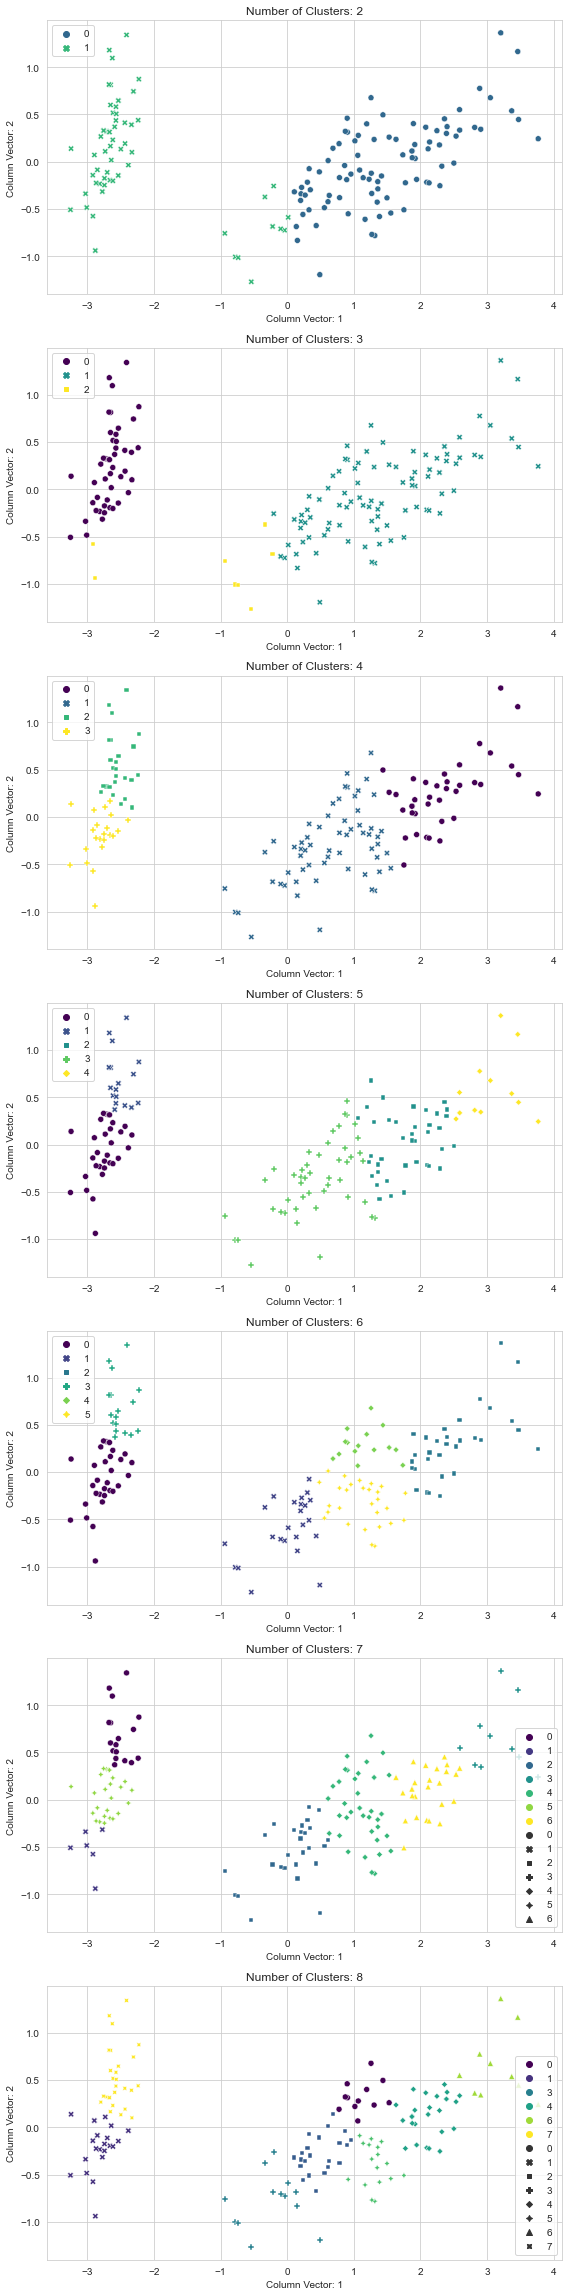

In [36]:
num_row = 7
num_col = 1
fig, axes = plt.subplots(num_row, num_col, figsize=(8,32))
for i in range(7):
    ax = axes[i%7]
    plt.sca(ax)
    sns.scatterplot(x = principalDf["column_1"],y = principalDf["column_2"],style=id_x[i],hue=id_x[i],palette='viridis');
    ax.set_title("Number of Clusters: " + str(i+2))
    ax.set_xlabel("Column Vector: 1")
    ax.set_ylabel("Column Vector: 2")
    fig.savefig(
    "K-means regression for variable k.png",
    
    bbox_inches=mtransforms.Bbox(
        # input in [[xmin, ymin], [xmax, ymax]]
        [[-0.5, 0.1], [1.5, 0.9]]
    ).transformed(
        (fig.transFigure - fig.dpi_scale_trans)
    ),
    )     
fig.tight_layout()
plt.show()
#plot the cluster representatives

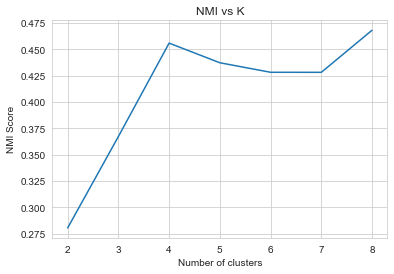

In [37]:
plt.xlabel("Number of clusters")
plt.ylabel("NMI Score")
plt.title("NMI vs K")
plt.plot(range(2,9),nmi)
plt.savefig("NMI vs K_PCA.png",bbox_inches = 'tight')


## PCA with original dataset of 4 features

In [38]:
y = data["Class Label"].values
x = data.drop("Class Label",axis = 1).to_numpy()

In [39]:
print("K-Means on original dataset")
cluster=[]
id_x = []
nmi = []
for K in range(2,9): 
    initial_cluster_rep = fromdatainitialise(x, K)
    cluster_rep, idx,num = runkMeans(x, initial_cluster_rep,findClosestcluster_rep,computecluster_rep)
    cost = computeCost(x,cluster_rep,idx)
    
    mut = mutual(y,idx,K,3)
    nmi.append(2* (class_entropy(y,3)-mut)/(class_entropy(y,3) + cluster_entropy(idx,K)))
    print("Normalised Mutual Information for k = ",K," ",nmi[K-2])
    
    cluster.append(cluster_rep)
    id_x.append(idx)
    print("Final Cost: {0:.10f}".format(cost))
    print("\n")
#run k means for randomly picking k data points as initial cluster representatives

K-Means on original dataset
Normalised Mutual Information for k =  2   0.2958861179459313
Final Cost: 1.0682562440


Normalised Mutual Information for k =  3   0.4930295934613386
Final Cost: 0.5300766178


Normalised Mutual Information for k =  4   0.465895376874992
Final Cost: 0.4205022316


Normalised Mutual Information for k =  5   0.4871013777503706
Final Cost: 0.3608978826


Normalised Mutual Information for k =  6   0.528433867688799
Final Cost: 0.2824775471


Normalised Mutual Information for k =  7   0.4100968965074195
Final Cost: 0.2813061447


Normalised Mutual Information for k =  8   0.4600233867975324
Final Cost: 0.2054024754




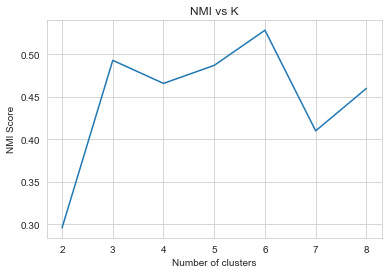

In [40]:
plt.xlabel("Number of clusters")
plt.ylabel("NMI Score")
plt.title("NMI vs K")
plt.plot(range(2,9),nmi)
plt.savefig("NMI vs K_orig.png",bbox_inches = 'tight')